In [39]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed
from sklearn import datasets
from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_blobs,make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.linear_model import Perceptron, RANSACRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import combinations
import pyprind
import re
from nltk import PorterStemmer
from nltk import download
from nltk.corpus import stopwords

### K-means Clustering

In [30]:
# Prepare blobs 
X, y = make_blobs(n_samples = 150, 
                  n_features = 2, 
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)

print('Data is of dimension %d x %d'%(X.shape[0],X.shape[1]))

Data is of dimension 150 x 2


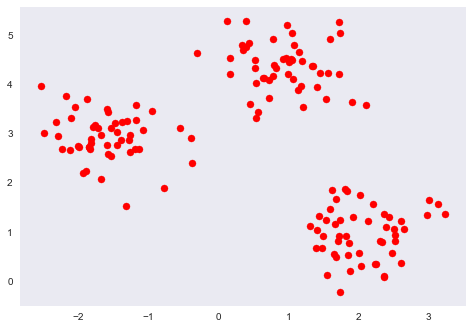

In [31]:
# plot the data 
plt.scatter(X[:,0],X[:,1],c='red',marker='o',s=50)
plt.grid()
plt.show()

In [33]:
# Using sklearn's kmeans
km = KMeans(n_clusters = 3, 
            init = 'random',   # random or kmeans++; initial centroid placement
            n_init = 10,       # Repeat n_init times
            max_iter = 300,    # Per iteration repeat inner loop max_iter times
            tol = 1e-04,       # Stopping criteria
            random_state = 0)

y_km = km.fit_predict(X)
#print('Cluster Centers:\n',km.cluster_centers_)
#print('\nCluster Labels:\n',km.labels_)
#print('\nCluster Inertia:\n',km.inertia_)

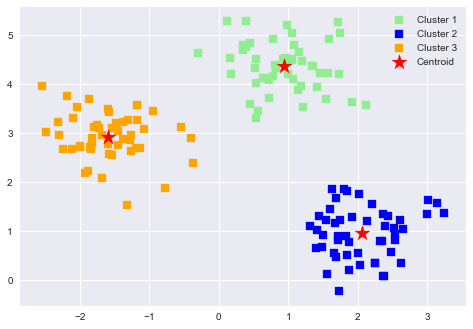

In [37]:
# plot
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='blue',
            marker='s',
            label='Cluster 2')

plt.scatter(X[y_km==2,0],
            X[y_km==2,1],
            s=50,
            c='orange',
            marker='s',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            c='red',
            marker='*',
            label='Centroid')

plt.legend()
#plt.grid()
plt.show()


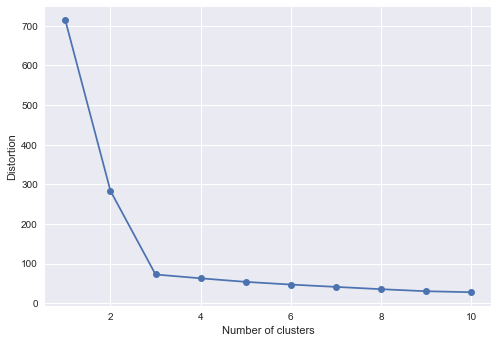

In [38]:
# Elbow method to find k 

distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i, 
                init = 'k-means++',   # random or kmeans++; initial centroid placement
                n_init = 10,       # Repeat n_init times
                max_iter = 300,    # Per iteration repeat inner loop max_iter times
                tol = 1e-04,       # Stopping criteria
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)


plt.plot(range(1,11),distortions,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

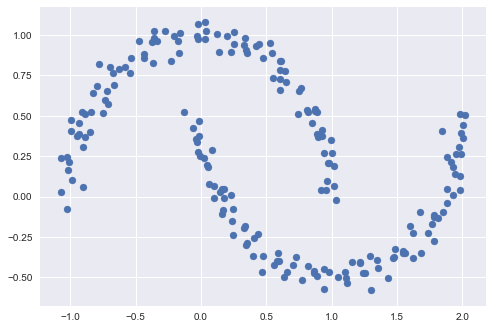

In [41]:
# Half moon dataset
X,y = make_moons(n_samples = 200, 
                 noise = 0.05, 
                 random_state = 0)
plt.scatter(X[:,0],X[:,1])
plt.show()


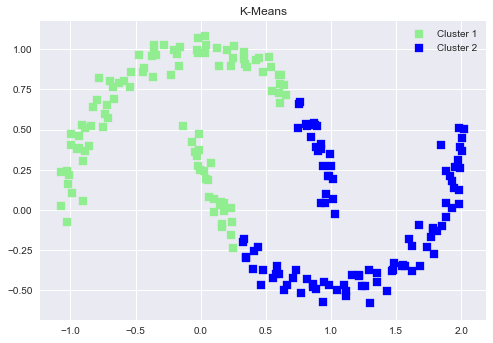

In [46]:
# K-means
km = KMeans(n_clusters = 2,
            random_state =0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='blue',
            marker='s',
            label='Cluster 2')


plt.legend()
plt.title('K-Means')
plt.show()


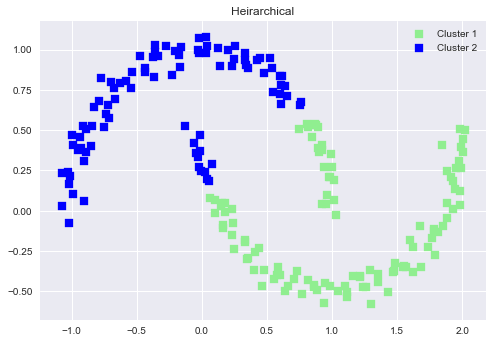

In [47]:
# Agglomerative Clustering (heirarchical)
ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
y_ac = ac.fit_predict(X)

plt.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            s=50,
            c='blue',
            marker='s',
            label='Cluster 2')


plt.legend()
plt.title('Heirarchical')
plt.show()


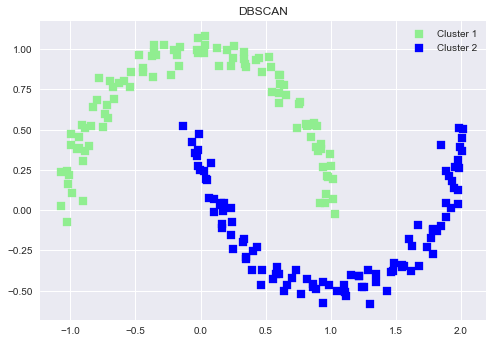

In [49]:
# DBSCAN
db = DBSCAN(eps = 0.2, 
            min_samples = 5,
            metric= 'euclidean')

y_db = db.fit_predict(X)


plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            s=50,
            c='blue',
            marker='s',
            label='Cluster 2')


plt.legend()
plt.title('DBSCAN')
plt.show()
